##### 히트맵

In [5]:
import numpy as np
import pandas as pd

In [1]:
import matplotlib.pyplot as plt

In [6]:
vip_df = pd.read_csv('./data/신용카드VIP회원정보_최종.csv')
vip_df.head()

,기준년월,발급회원번호,연령,VIP등급코드,회원여부_이용가능,회원여부_연체,탈회횟수_누적,최종탈회후경과월,탈회횟수_발급1년이내,거주시도명,...,컨택건수_이용유도_청구서_B0M,컨택건수_이용유도_인터넷_B0M,컨택건수_이용유도_당사앱_B0M,증감율_이용건수_신용_전월,증감율_이용금액_신용_전월,증감율_이용건수_신용_분기,증감율_이용금액_신용_분기,변동률_잔액_B1M,양육자녀_유무,y
0,201807,SYN_0,40,7,1,0,1,61,0,경기,...,0,0,0,0.454549,0.409767,-0.476454,-0.411320,0.261886,1,0
1,201807,SYN_8,20,7,1,0,0,0,0,충남,...,0,1,0,-0.272107,0.137583,0.464710,0.228002,-0.241684,0,0
2,201807,SYN_9,30,6,1,0,0,0,0,경기,...,1,1,0,0.291142,0.329639,-0.345280,-0.061798,0.273881,1,0
3,201807,SYN_17,70,7,1,0,0,0,0,경기,...,0,1,0,-0.021992,0.304045,0.057209,-0.196456,0.131636,0,0
4,201807,SYN_18,40,7,1,0,0,0,0,경기,...,0,0,0,0.000000,0.000103,-2.000000,-2.000000,0.093721,1,0


In [27]:
x_cols = [
    "연령",
    # "VIP등급코드",
    # "양육자녀_유무",
    "CA이자율_할인전",
    # "거주시도명",
    # "Life_Stage",
    "유효카드수_신용",
    "이용카드수_신용",
    "이용가맹점수",
    "_1순위카드이용금액",
    "_1순위카드이용건수",
    "_2순위카드이용금액",
    "_2순위카드이용건수",
    "잔액_B0M",
    "월중평잔",
    "평잔_3M",
    "평잔_6M",
    "변동률_잔액_B1M",
    "포인트_잔여포인트_B0M",
    "마일_잔여포인트_B0M",
    "강제한도감액금액_R12M",
    "한도증액금액_R12M",
    "연체일수_B2M"
]

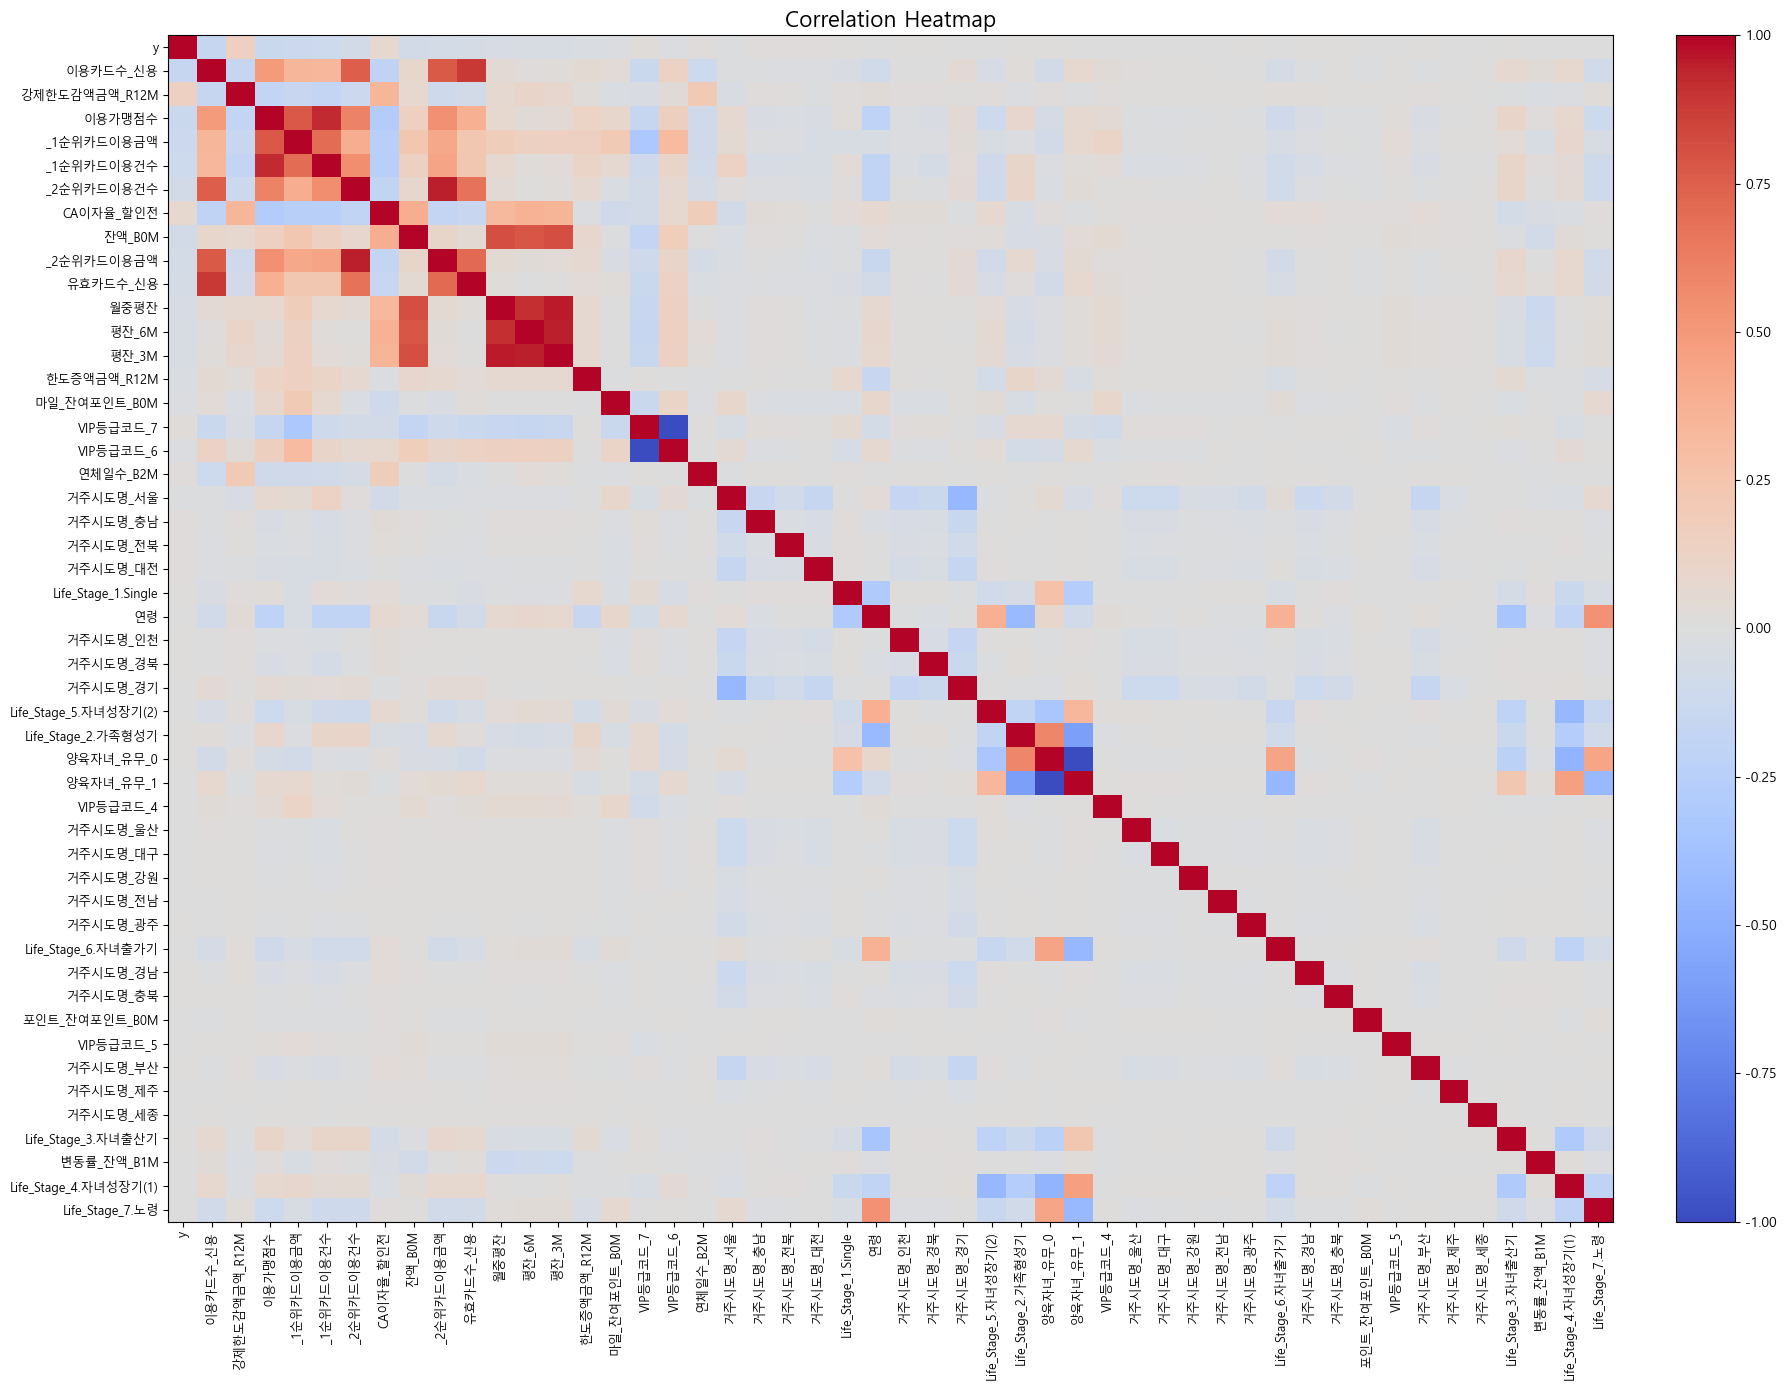

In [12]:
# 7) 히트맵 (글씨 보이게 + 파랑~빨강 + 상위 N개만)
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"   # 한글 폰트
plt.rcParams["axes.unicode_minus"] = False      # 마이너스 깨짐 방지
target = "y"
N = 60  # 너무 많으면 글씨 절대 안보임. 40~80 사이로 조절

cols_sorted = corr[target].abs().sort_values(ascending=False).index[:N]
corr_sorted = corr.loc[cols_sorted, cols_sorted]

plt.figure(figsize=(18, 14))
im = plt.imshow(
    corr_sorted,
    cmap="coolwarm",   # 파랑(음수)~빨강(양수)
    vmin=-1, vmax=1,   # 색 범위 고정
    aspect="auto"
)
plt.colorbar(im, fraction=0.046, pad=0.04)

plt.xticks(range(len(cols_sorted)), cols_sorted, rotation=90, fontsize=9)
plt.yticks(range(len(cols_sorted)), cols_sorted, fontsize=9)

plt.title(f"Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

In [11]:
# (옵션) y와 상관 큰 순서 출력
print(corr[target].sort_values(ascending=False).head(20))
print(corr[target].sort_values(ascending=True).head(20))

y                        1.000000
강제한도감액금액_R12M            0.146303
CA이자율_할인전                0.071593
VIP등급코드_7                0.022246
연체일수_B2M                 0.014285
거주시도명_충남                 0.009285
거주시도명_전북                 0.008239
거주시도명_대전                 0.008170
Life_Stage_1.Single      0.007714
거주시도명_인천                 0.007256
거주시도명_경북                 0.007254
Life_Stage_2.가족형성기       0.004925
양육자녀_유무_0                0.004659
거주시도명_광주                 0.002921
거주시도명_경남                 0.002805
거주시도명_충북                 0.002741
거주시도명_부산                 0.001566
Life_Stage_3.자녀출산기       0.000841
Life_Stage_7.노령         -0.000040
Life_Stage_4.자녀성장기(1)   -0.000104
Name: y, dtype: float64
이용카드수_신용                -0.157688
이용가맹점수                  -0.125557
_1순위카드이용금액              -0.123531
_1순위카드이용건수              -0.114024
_2순위카드이용건수              -0.074112
잔액_B0M                  -0.071387
_2순위카드이용금액              -0.067215
유효카드수_신용                -0.062352
월중평잔                    

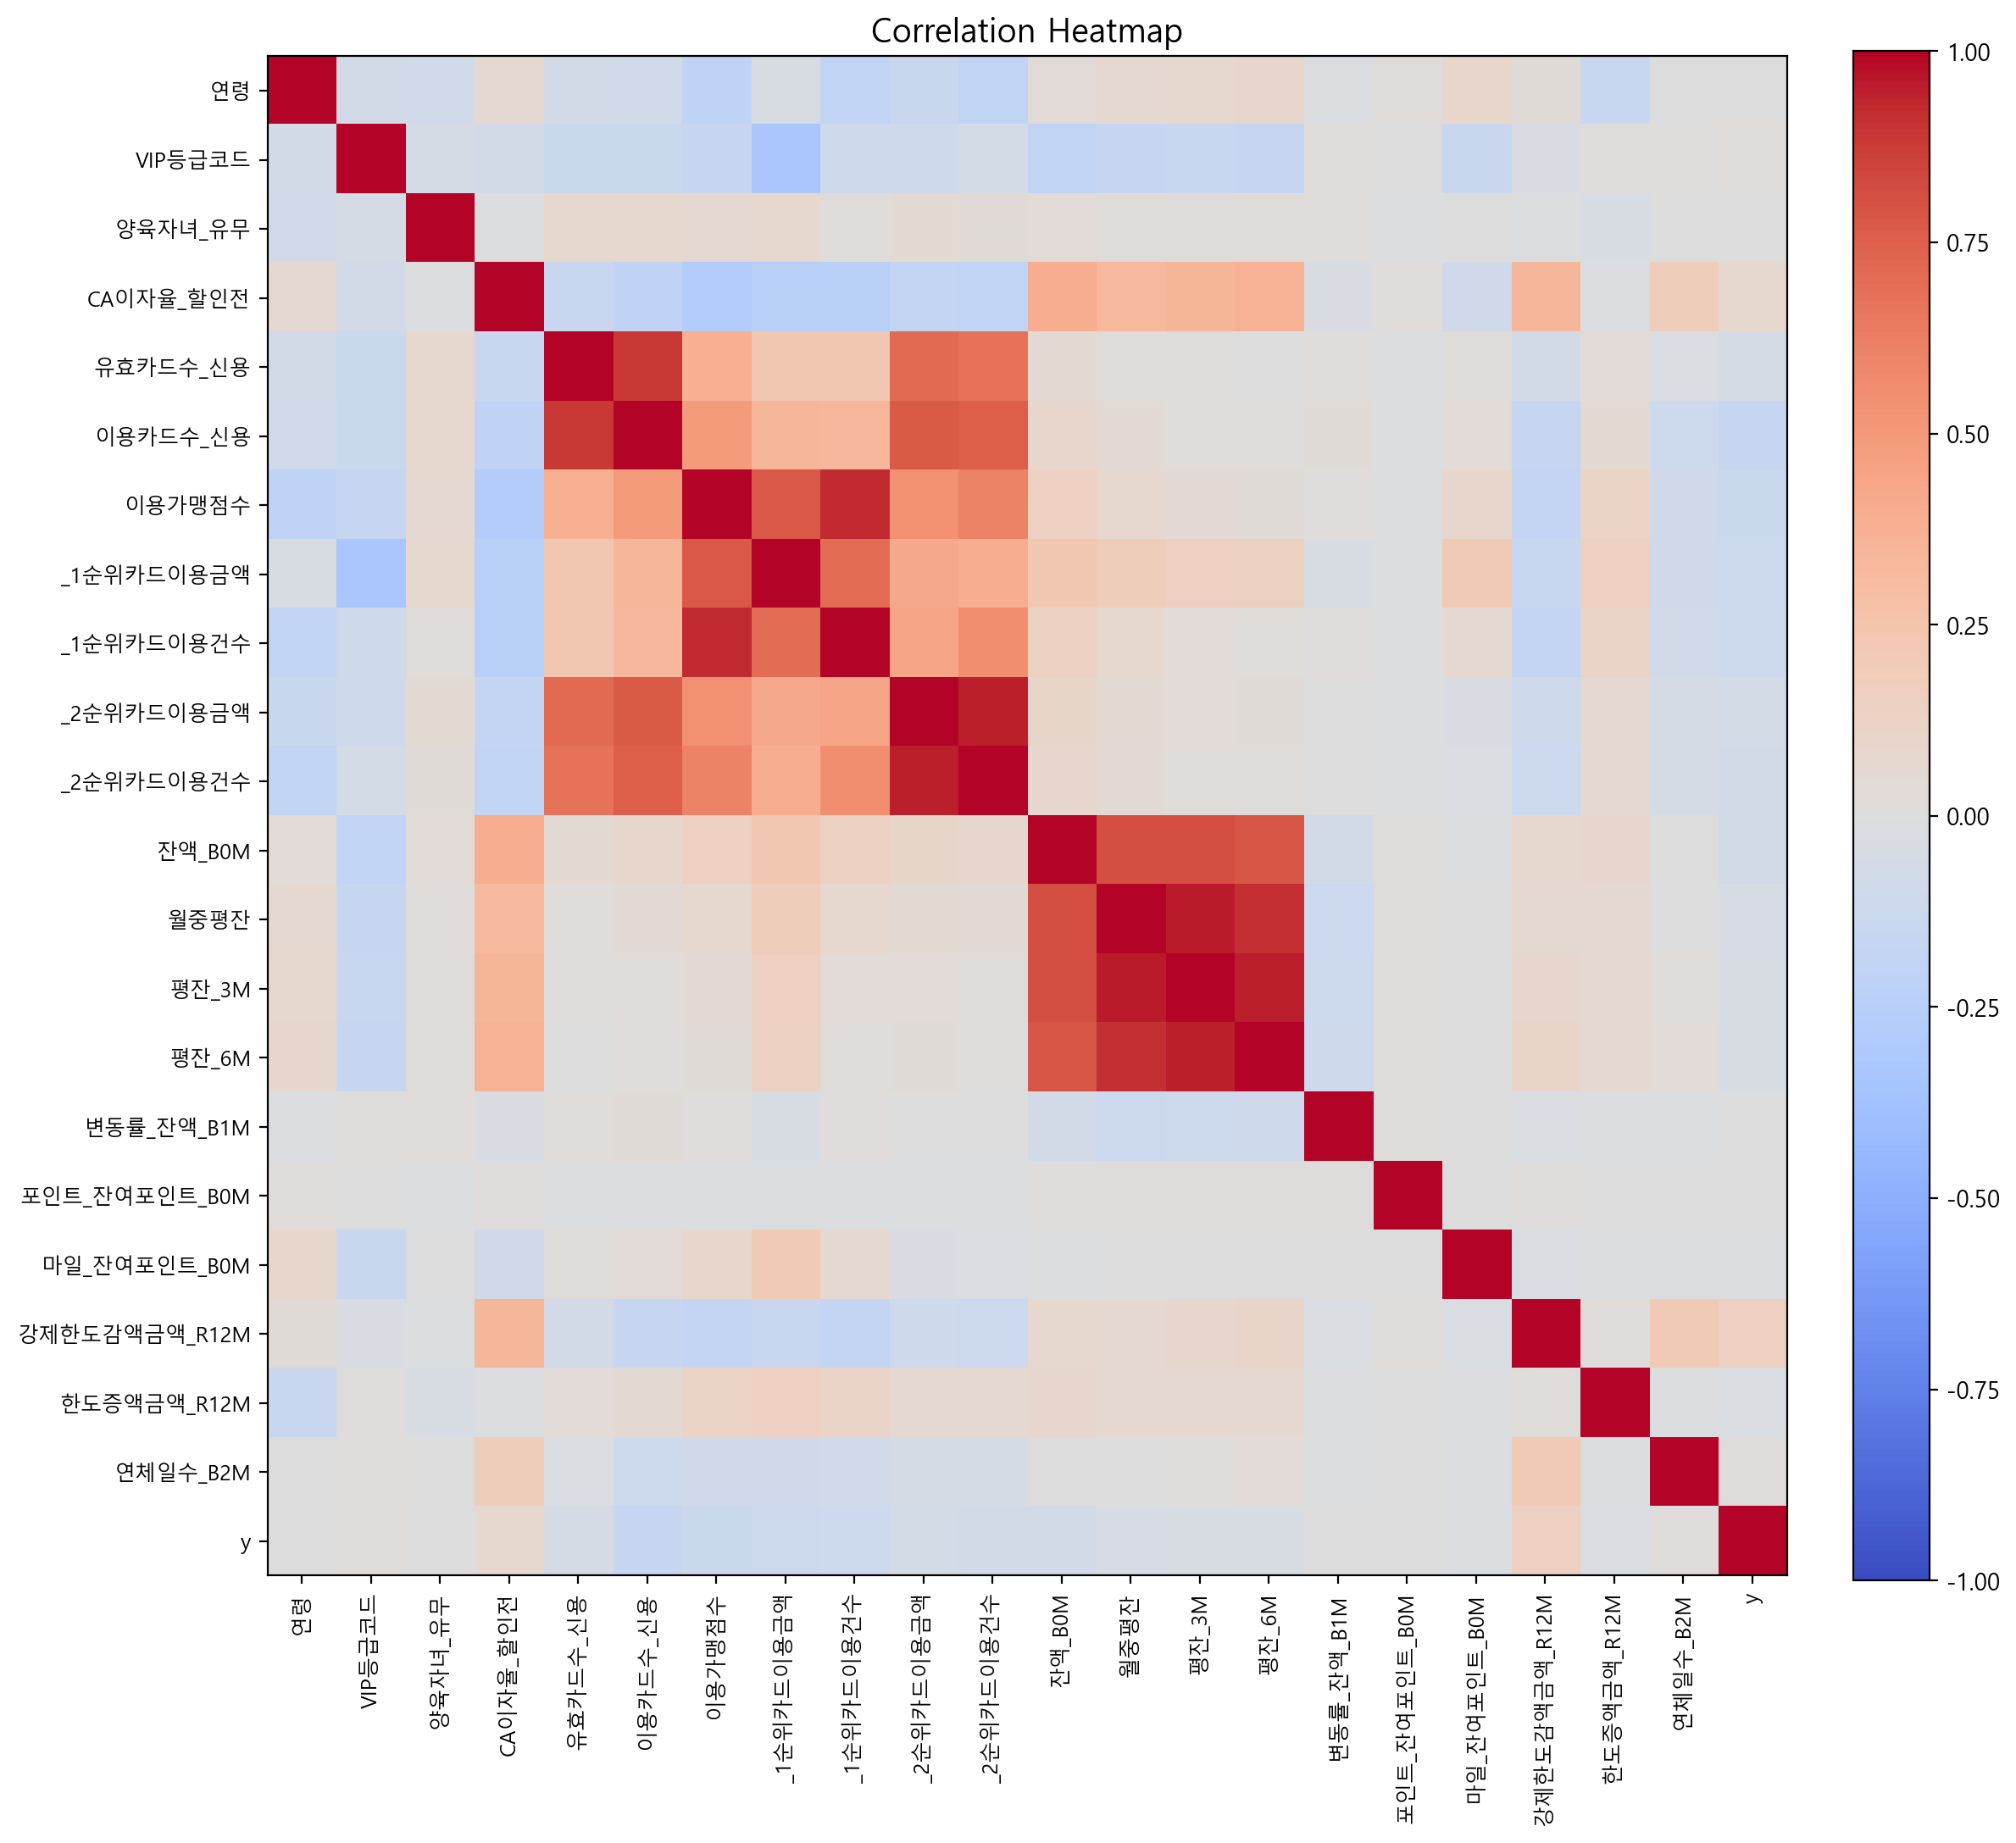

히트맵에 포함된 컬럼: ['연령', 'VIP등급코드', '양육자녀_유무', 'CA이자율_할인전', '유효카드수_신용', '이용카드수_신용', '이용가맹점수', '_1순위카드이용금액', '_1순위카드이용건수', '_2순위카드이용금액', '_2순위카드이용건수', '잔액_B0M', '월중평잔', '평잔_3M', '평잔_6M', '변동률_잔액_B1M', '포인트_잔여포인트_B0M', '마일_잔여포인트_B0M', '강제한도감액금액_R12M', '한도증액금액_R12M', '연체일수_B2M', 'y']


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# (윈도우) 한글 폰트
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

# 1) x_cols + y만 가져오기
use_cols = x_cols + ["y"]
df_hm = vip_df[use_cols].copy()

# 2) 원핫 없이: 전부 숫자 변환 시도 (문자/범주형은 NaN으로 됨)
for c in df_hm.columns:
    df_hm[c] = pd.to_numeric(df_hm[c], errors="coerce")

# 3) 숫자형 컬럼만 남기기 (변환 실패한 범주형은 자동 제외)
df_hm = df_hm.select_dtypes(include="number")

# 4) 결측 처리
df_hm = df_hm.fillna(0)

# 5) 상관행렬 (y 포함 => 정사각형)
corr = df_hm.corr()

# 6) 정사각형 히트맵
fig, ax = plt.subplots(figsize=(12, 12), dpi=200)   # 정사각형 캔버스
im = ax.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1, aspect="equal")  # 정사각형 셀

plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90, fontsize=9)
ax.set_yticklabels(corr.columns, fontsize=9)

ax.set_title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

print("히트맵에 포함된 컬럼:", df_hm.columns.tolist())

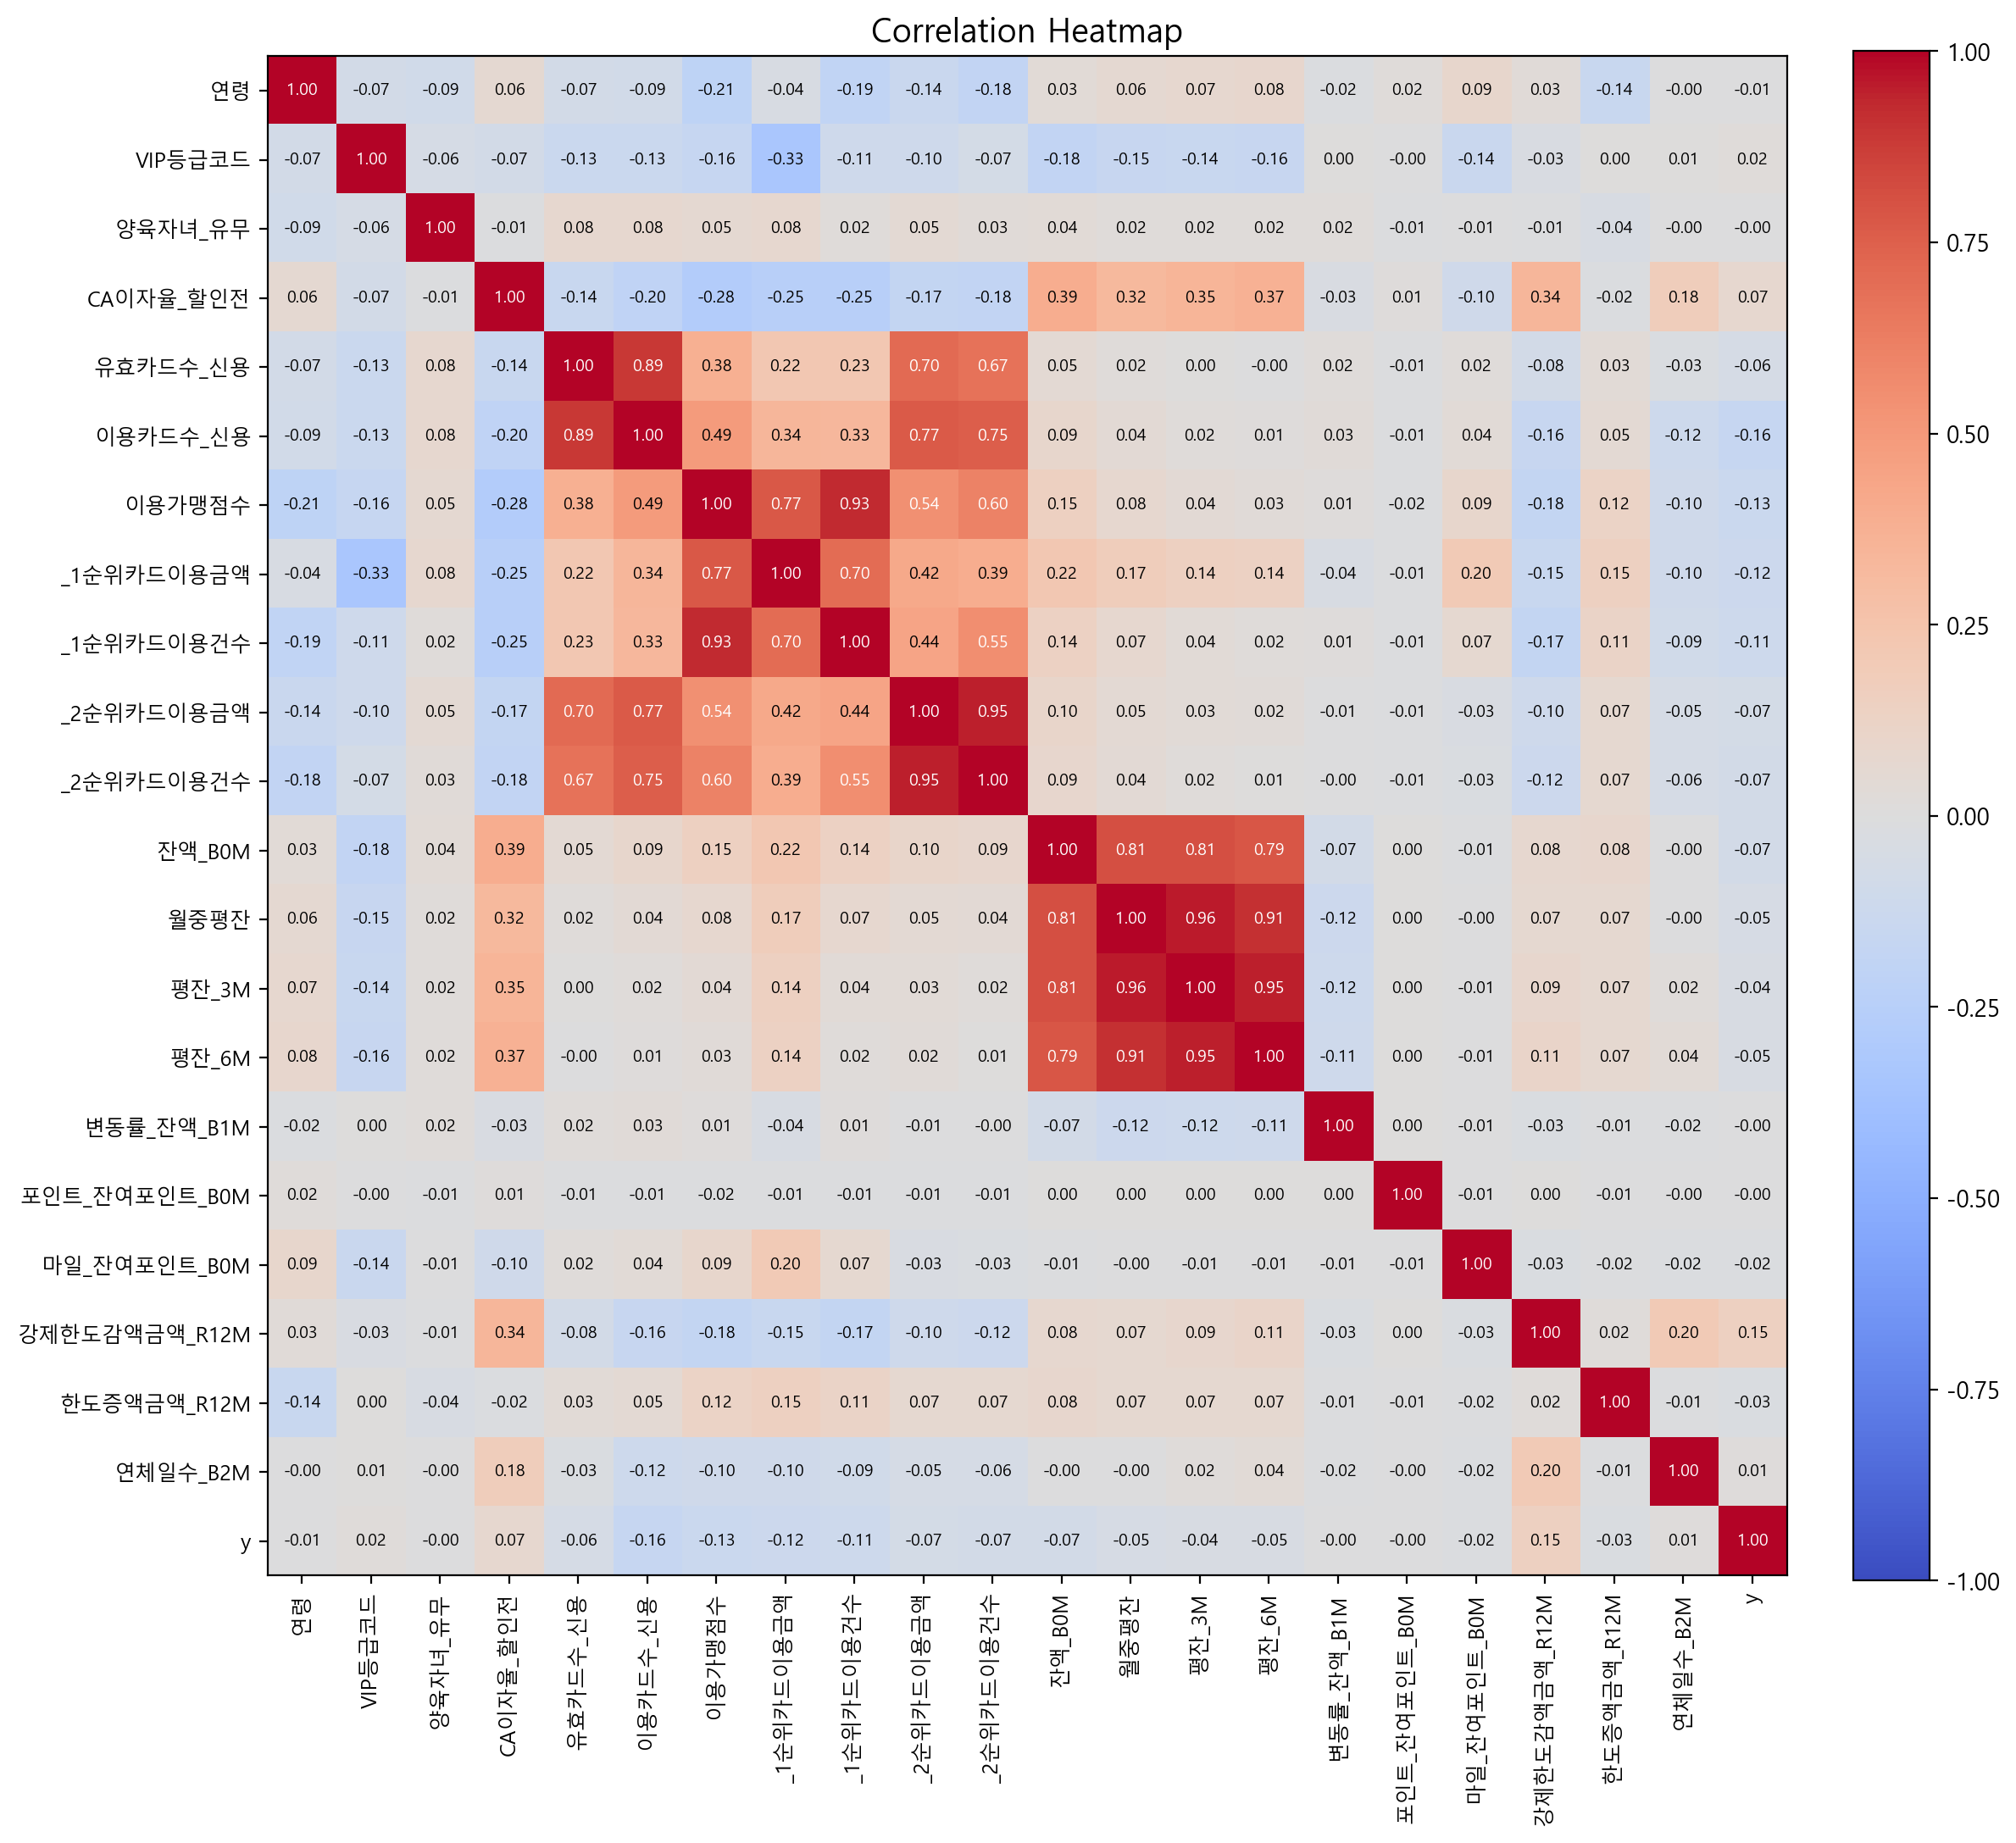

히트맵에 포함된 컬럼: ['연령', 'VIP등급코드', '양육자녀_유무', 'CA이자율_할인전', '유효카드수_신용', '이용카드수_신용', '이용가맹점수', '_1순위카드이용금액', '_1순위카드이용건수', '_2순위카드이용금액', '_2순위카드이용건수', '잔액_B0M', '월중평잔', '평잔_3M', '평잔_6M', '변동률_잔액_B1M', '포인트_잔여포인트_B0M', '마일_잔여포인트_B0M', '강제한도감액금액_R12M', '한도증액금액_R12M', '연체일수_B2M', 'y']


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# (윈도우) 한글 폰트
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

# 1) x_cols + y만
use_cols = x_cols + ["y"]
df_hm = vip_df[use_cols].copy()

# 2) 원핫 없이 숫자 변환(문자/범주형은 NaN)
for c in df_hm.columns:
    df_hm[c] = pd.to_numeric(df_hm[c], errors="coerce")

# 3) 숫자형만 남김 (y 포함)
df_hm = df_hm.select_dtypes(include="number").fillna(0)

# 4) 상관행렬 (정사각형)
corr = df_hm.corr()

# 5) 히트맵 + 셀 안에 숫자 표시
fig, ax = plt.subplots(figsize=(12, 12), dpi=200)
im = ax.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1, aspect="equal")

plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

labels = corr.columns.tolist()
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=90, fontsize=9)
ax.set_yticklabels(labels, fontsize=9)

# 셀 안에 숫자(상관계수) 찍기
for i in range(len(labels)):
    for j in range(len(labels)):
        val = corr.iat[i, j]
        ax.text(
            j, i, f"{val:.2f}",
            ha="center", va="center",
            fontsize=7,
            color="white" if abs(val) > 0.5 else "black"
        )

ax.set_title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

print("히트맵에 포함된 컬럼:", labels)

In [20]:
target = "y"

# y 제외하고 정렬
s = corr[target].drop(target).sort_values(ascending=False)

print("=== y와 양의 상관 상위 10개 ===")
print(s.head(10))

print("\n=== y와 음의 상관 상위 10개 ===")
print(s.tail(10))

=== y와 양의 상관 상위 10개 ===
강제한도감액금액_R12M    0.146303
CA이자율_할인전        0.071593
VIP등급코드          0.022323
연체일수_B2M         0.014285
변동률_잔액_B1M      -0.000379
포인트_잔여포인트_B0M   -0.001913
양육자녀_유무         -0.004659
연령              -0.007300
마일_잔여포인트_B0M    -0.022771
한도증액금액_R12M     -0.028887
Name: y, dtype: float64

=== y와 음의 상관 상위 10개 ===
평잔_6M        -0.045511
월중평잔         -0.046918
유효카드수_신용     -0.062352
_2순위카드이용금액   -0.067215
잔액_B0M       -0.071387
_2순위카드이용건수   -0.074112
_1순위카드이용건수   -0.114024
_1순위카드이용금액   -0.123531
이용가맹점수       -0.125557
이용카드수_신용     -0.157688
Name: y, dtype: float64


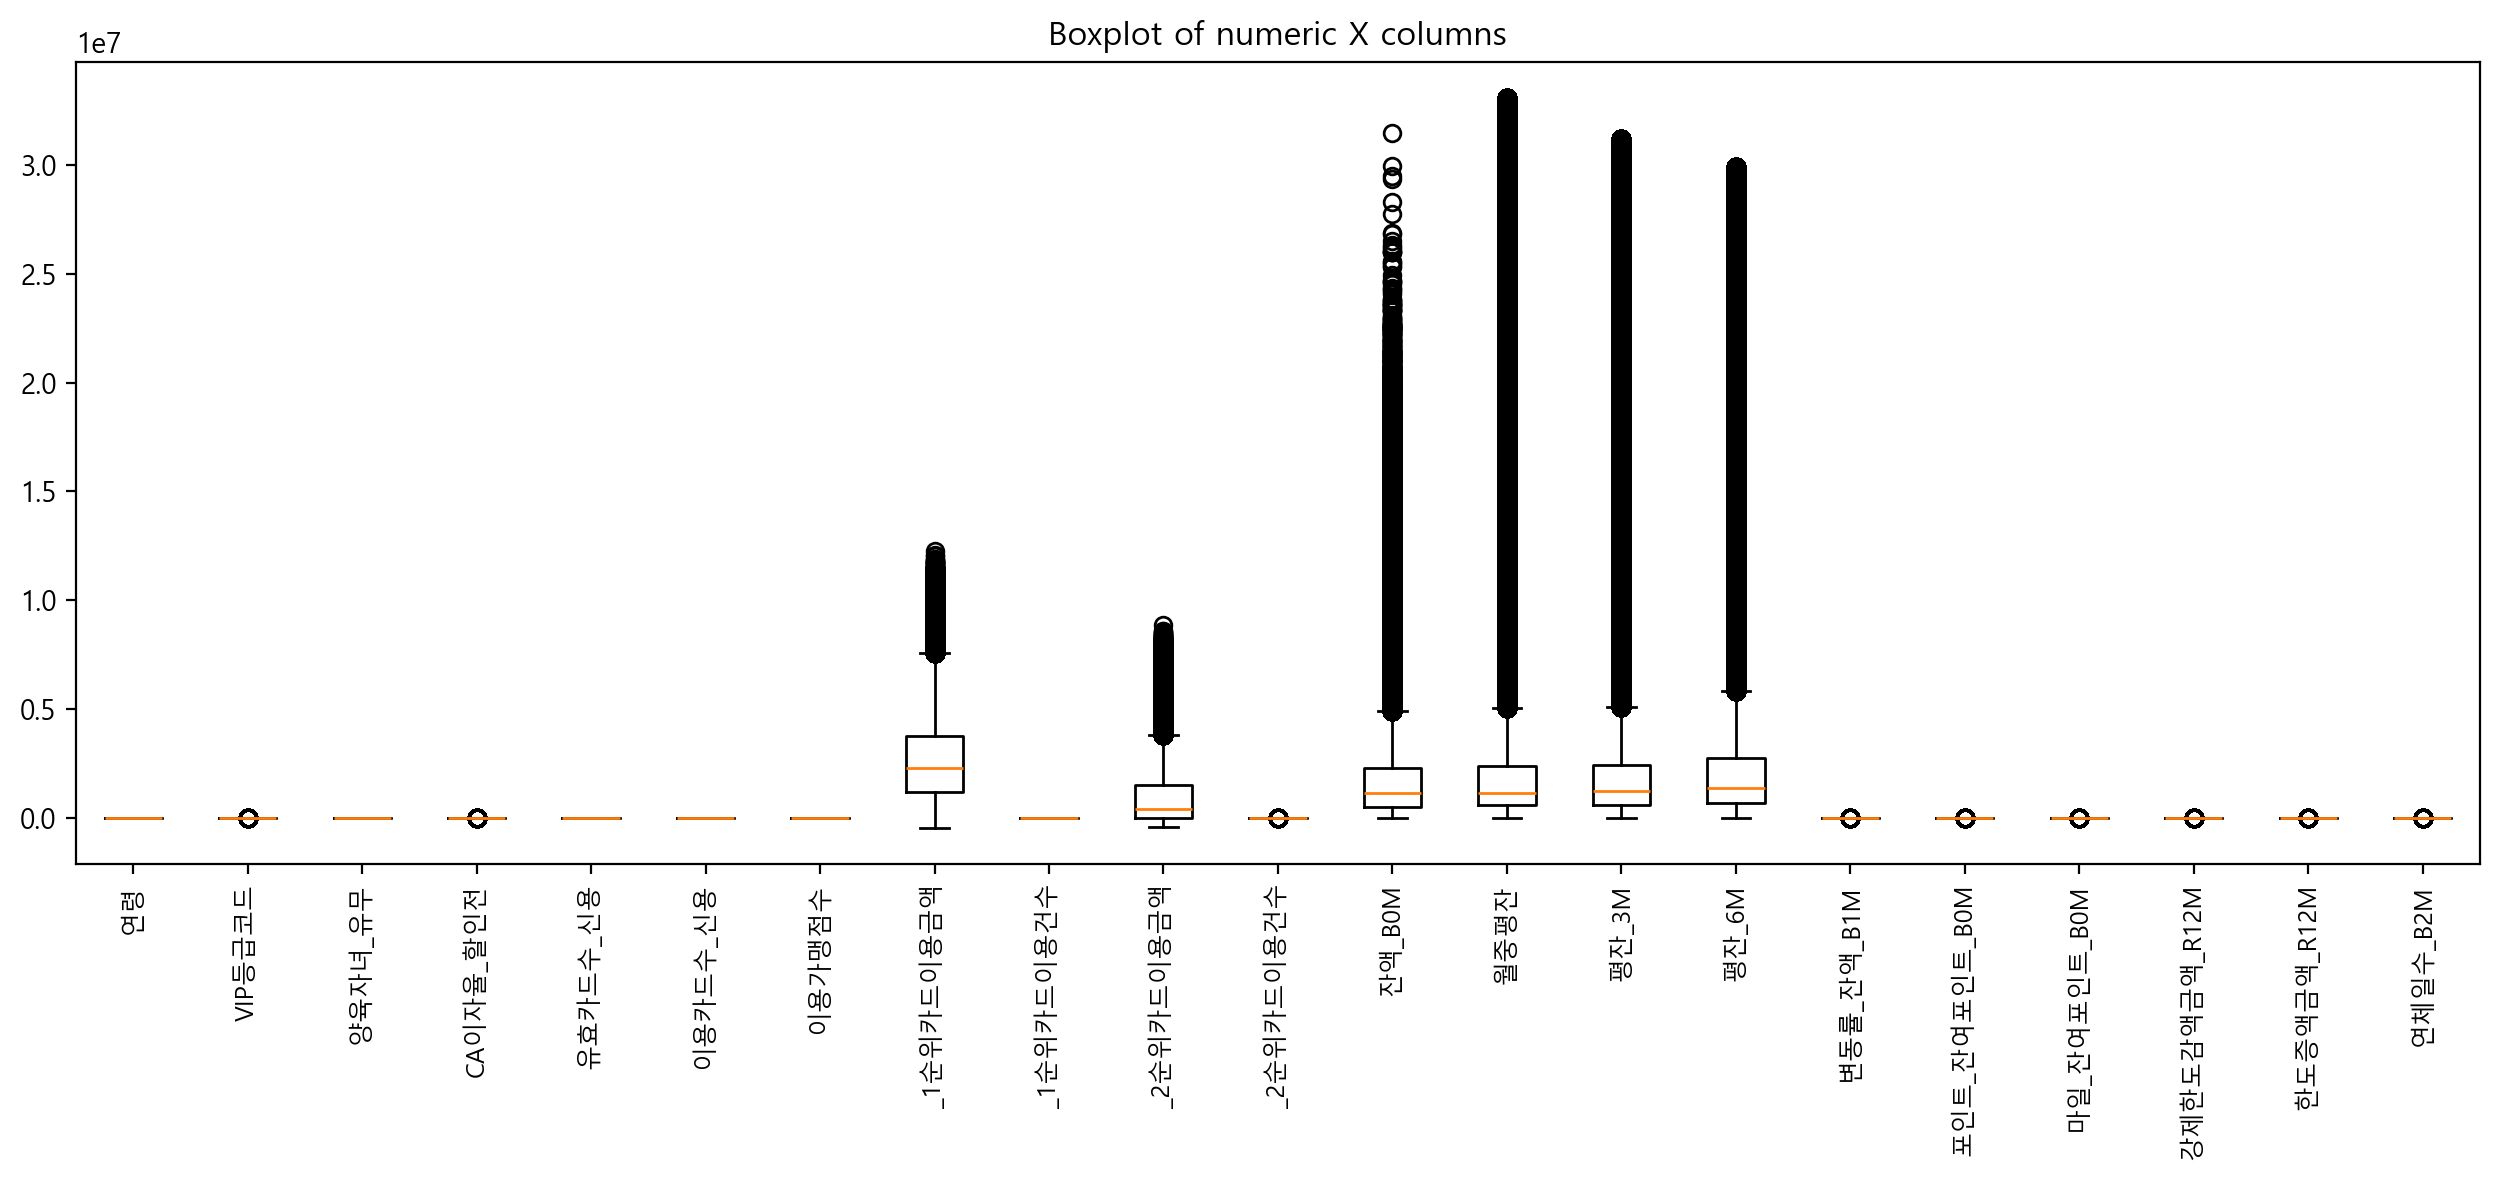

In [22]:
import matplotlib.pyplot as plt

# 한글 폰트(윈도우)
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

# x_cols 중 숫자형만
df_box = vip_df[x_cols].copy()
num_cols = df_box.select_dtypes(include="number").columns.tolist()

plt.figure(figsize=(max(12, len(num_cols) * 0.6), 6), dpi=200)
plt.boxplot([df_box[c].dropna().values for c in num_cols])  # showfliers 옵션 안 건드림(기본값=표시)
plt.xticks(range(1, len(num_cols) + 1), num_cols, rotation=90, fontsize=9)
plt.title("Boxplot of numeric X columns")
plt.tight_layout()
plt.show()

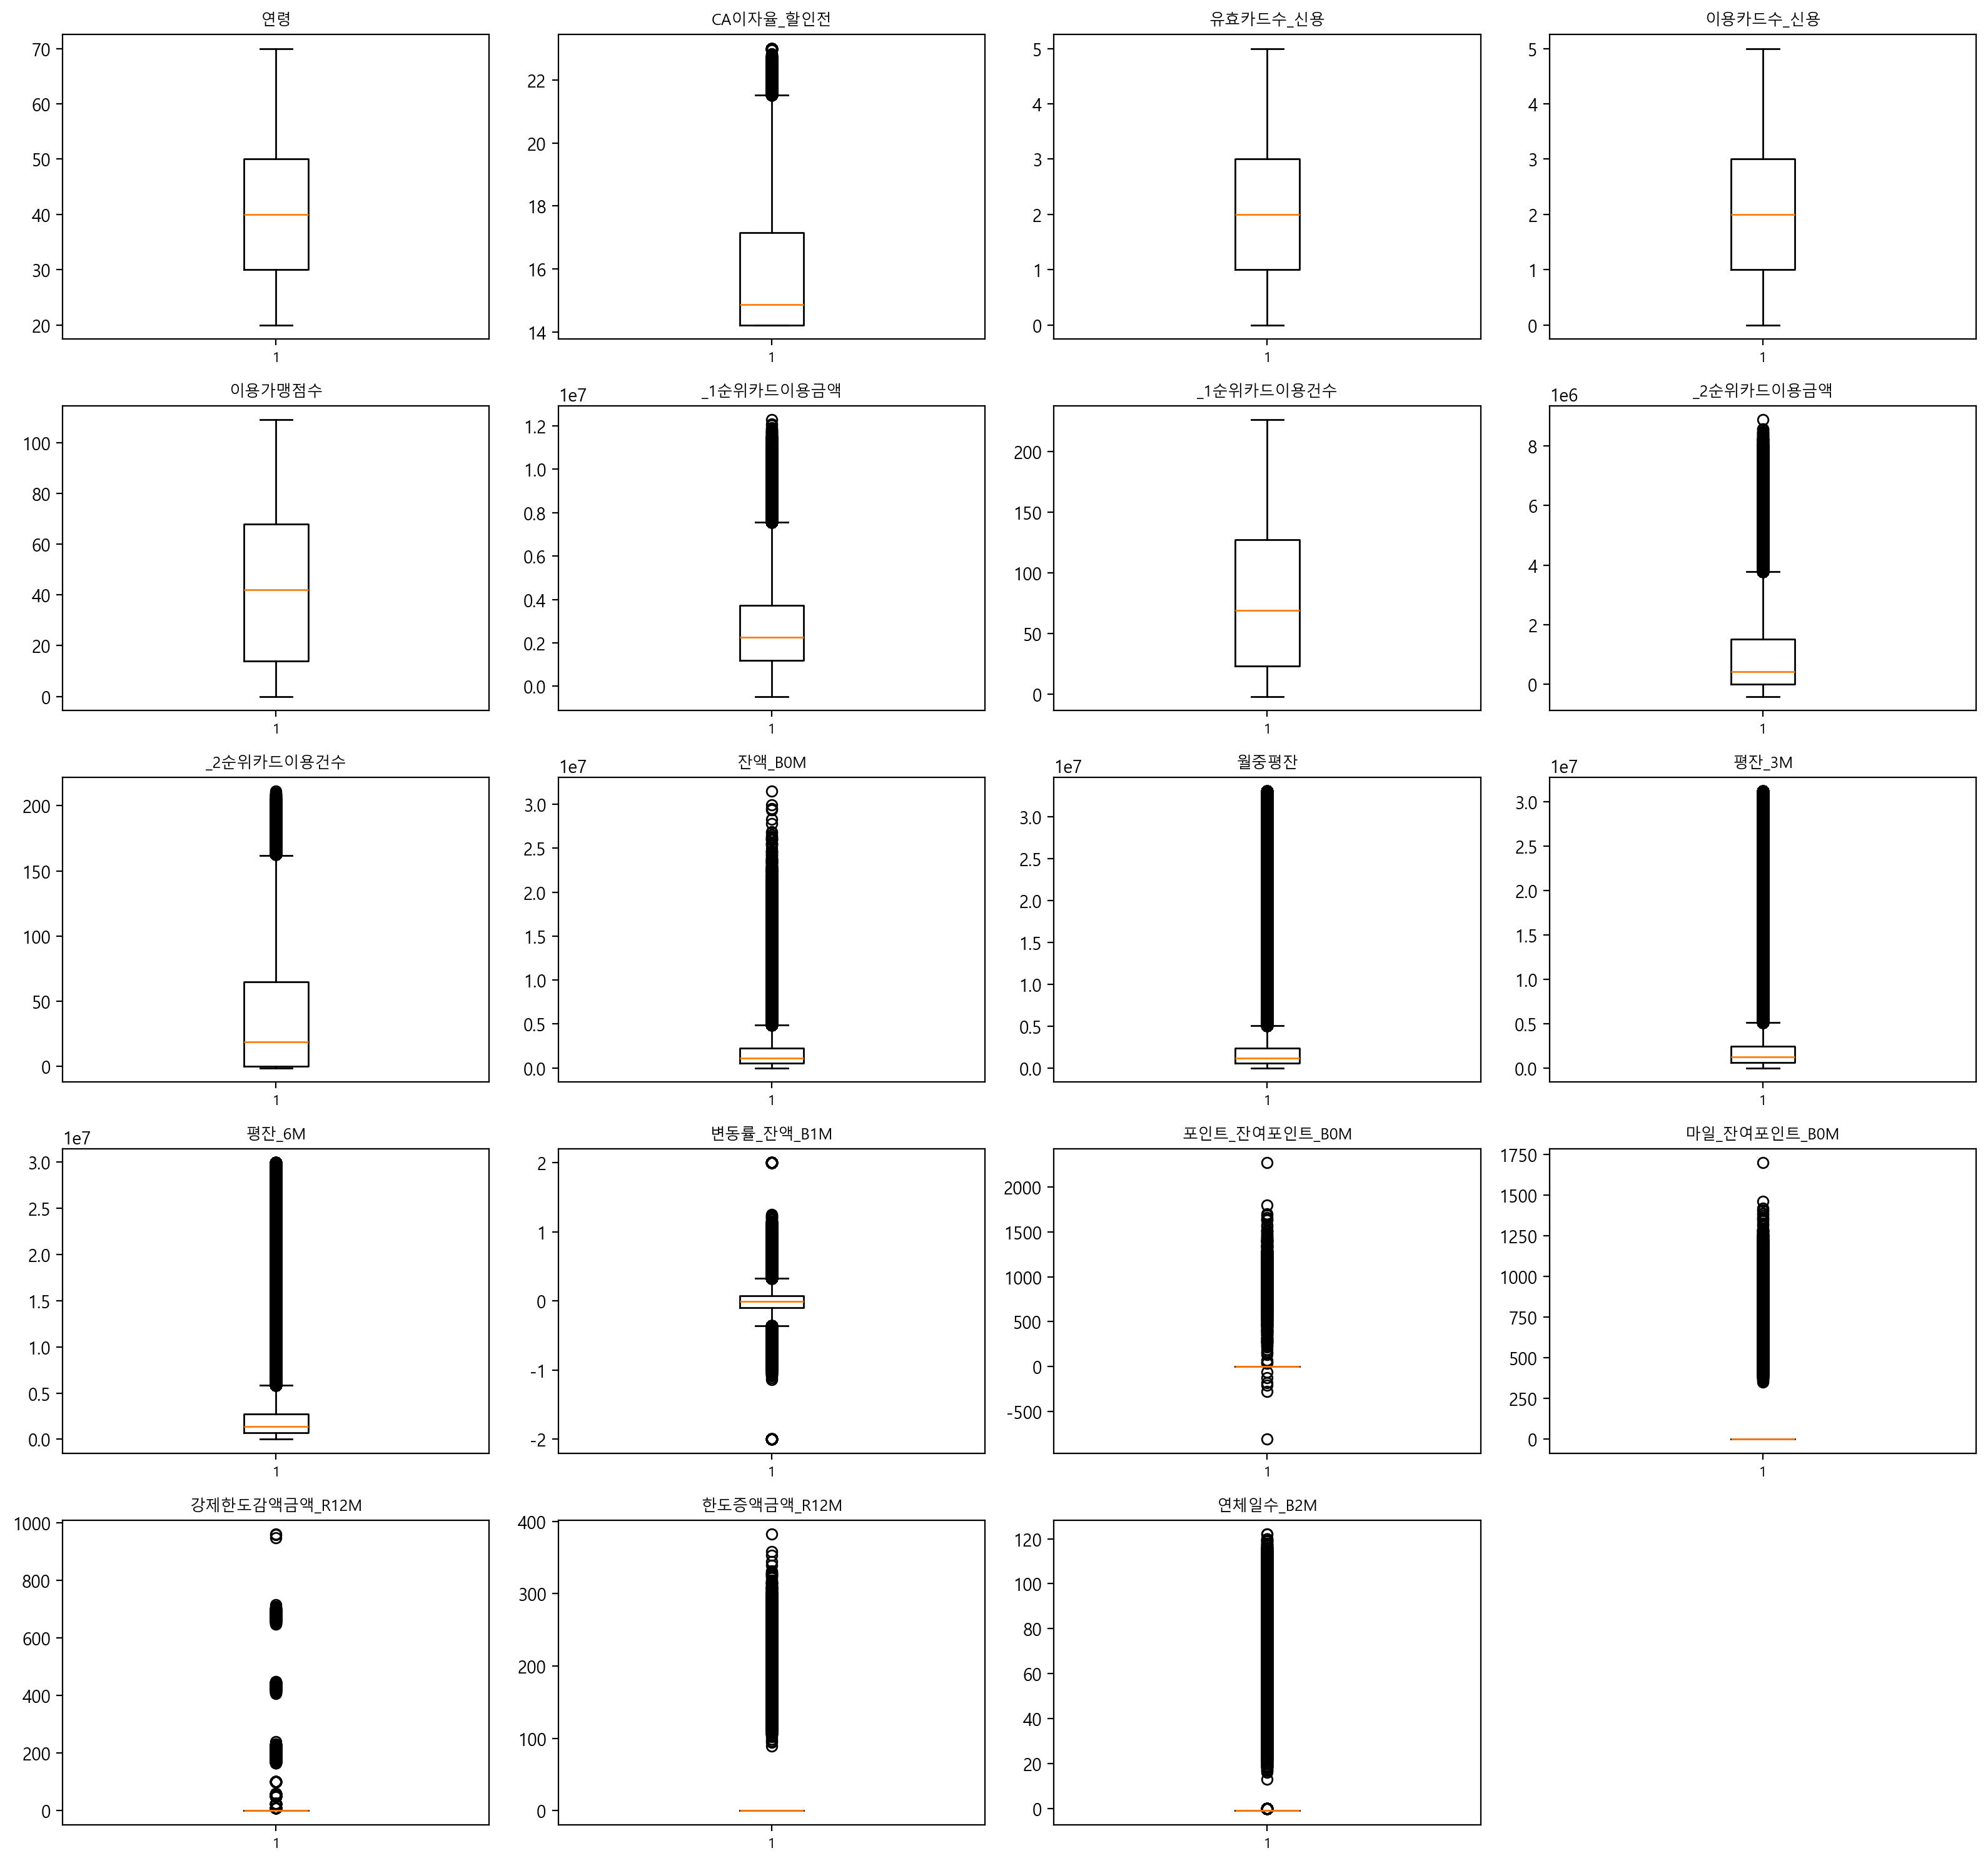

In [28]:
import math
import numpy as np
import matplotlib.pyplot as plt

# 한글 폰트(윈도우)
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

df_box = vip_df[x_cols].copy()
num_cols = df_box.select_dtypes(include="number").columns.tolist()

# 4열 그리드
ncols = 4
nrows = math.ceil(len(num_cols) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 3*nrows), dpi=200)
axes = np.array(axes).reshape(-1)  # 1차원으로 펴기

for i, c in enumerate(num_cols):
    ax = axes[i]
    ax.boxplot(df_box[c].dropna().values)  # 컬럼별 스케일
    ax.set_title(c, fontsize=9)
    ax.tick_params(axis='x', labelsize=8)

# 남는 칸 지우기
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()